In [1]:
from RL import ModelBasedRL
from RL import ModelFreeRL
from RL import SimulatedMDP
import gym

# Code below is to stop autoscroll in the notebook

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Creating MDP from simulated experience in OpenAI Gym environment, In this environment the blue state indicates the location the passenger should be picked up and the pink state indicates where the passenger should be dropped off. A reward of -1 is given for each ordinary move, a reward of -10 is given for picking up the wrong passenger, and a reward of 20 is given for dropping off the correct passenger in the correct location. Episodes end either when the incorrect passenger is picked up or when the correct passenger is dropped off in a location.

In [3]:
env = gym.make('Taxi-v2')
mdp = SimulatedMDP(env)

[2017-08-01 09:10:11,134] Making new env: Taxi-v2


# Model based reinforcement learning methods using dynamic programming

In [4]:
# Created instance of class to run model based algorithms.
model_rl = ModelBasedRL(max_eval=100)

# OpenAI Gym Taxi Example with Value Iteration

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
|_| : | : |
|Y| : |B: |


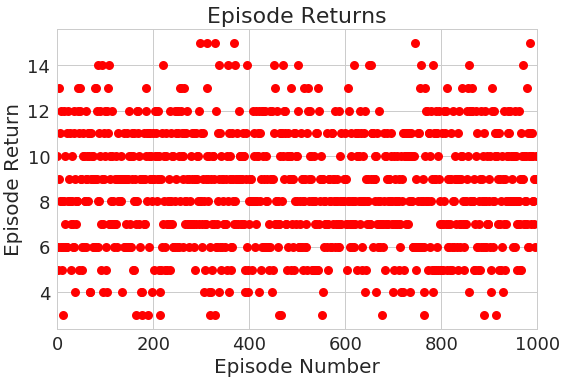

In [13]:
model_rl.value_iteration(mdp)

# Simulating using the policy that was learned and the last episode is displayed.
model_rl.simulate_policy(env)

# Plotting the returns at each episode.
model_rl.scatter_epsiode_returns()

# OpenAI Gym Taxi Example with Policy Iteration

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: 

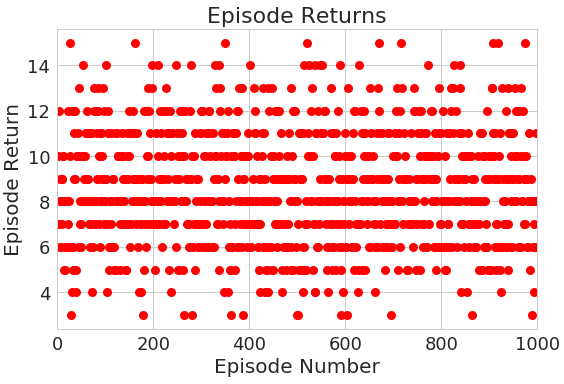

In [14]:
# Changing number of iterations to speed up results. Results are still good without complete convergence.

# Number of evaluations for each state in policy evaluation.
model_rl.max_eval = 10

# Number of iterations of both policy evaluation and policy improvement.
model_rl.max_iter = 100

model_rl.policy_iteration(mdp)

# Simulating using policy that was learned and the last epsiode is displayed.
model_rl.simulate_policy(env)

# Plotting the returns at each episode.
model_rl.scatter_epsiode_returns()

# OpenAI Gym Taxi Example with Q-Value Iteration

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | :_:G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+

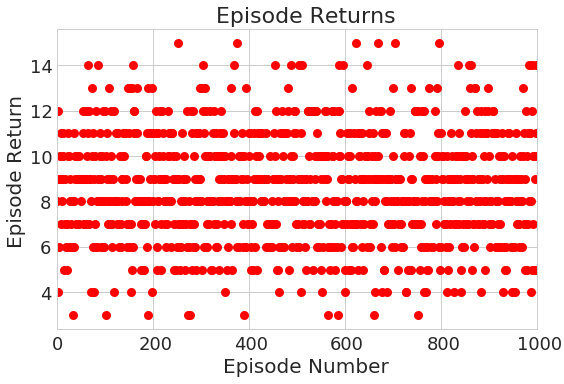

In [18]:
model_rl.max_eval = 100

model_rl.q_value_iteration(mdp)

# Simulating using policy that was learned and the last epsiode is displayed.
model_rl.simulate_policy(env)

# Plotting the returns at each episode.
model_rl.scatter_epsiode_returns()

# Model free based reinforcement learning using a set policy or learning from temporal differences

In [16]:
# Creating parameters needed for ModelFreeRL class.
n = env.observation_space.n
states = range(n)
m = env.action_space.n
actions = range(m)

# Model Free Reinforcement learning.
model_free_rl = ModelFreeRL(n=n, m=m, states=states, actions=actions)

# OpenAI Gym Taxi Example with Q-Learning

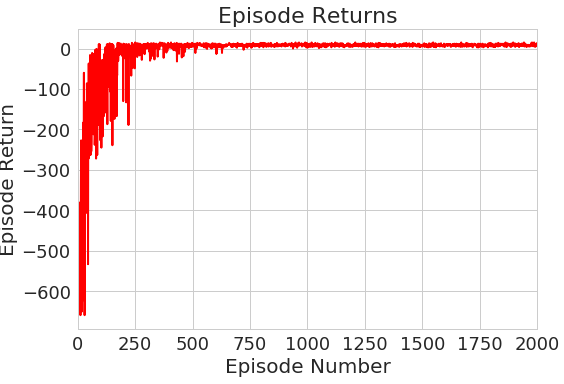

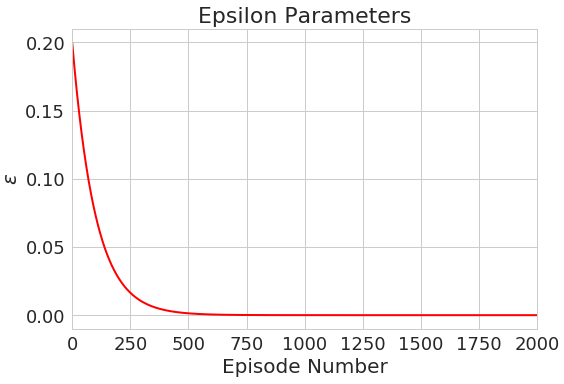

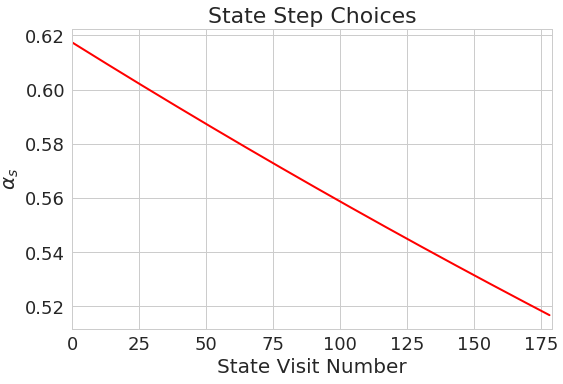

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
|_: : : : |
| | : | : |
|Y| : |B: |

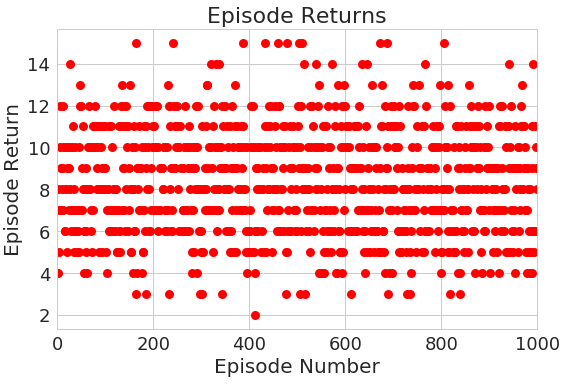

In [19]:
# Running the q-learning algorithm.
model_free_rl.q_learning(env)

# Plotting the returns at each episode.
model_free_rl.plot_epsiode_returns()

# Plotting the epsilon parameters at each episode.
model_free_rl.plot_epsilon_parameters()

# Plotting the step size parameter for a state.
model_free_rl.plot_alpha_parameters(s=2)

# Simulating using policy that was learned and the last epsiode is displayed.
model_free_rl.simulate_policy(env)

# Plotting the returns at each episode.
model_free_rl.scatter_epsiode_returns()

# OpenAI Gym Taxi Example with Sarsa

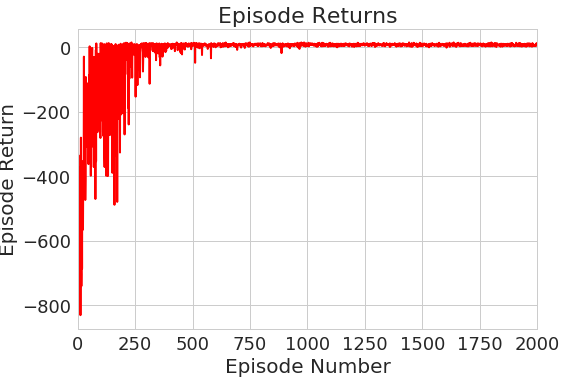

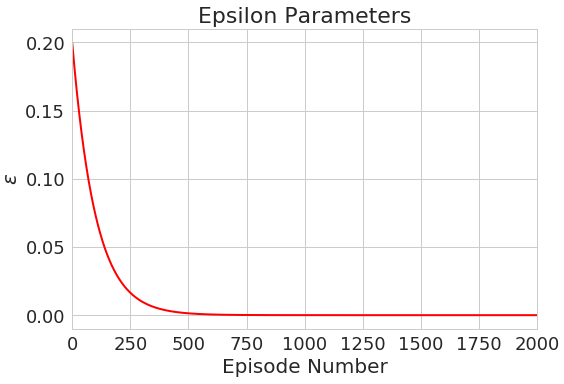

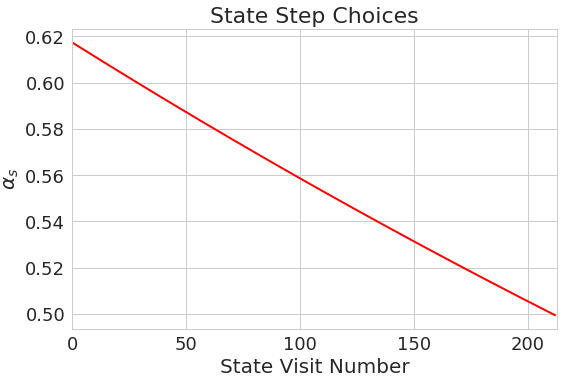

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : :_|
| : : : : |
| | : | : |
|Y| : |B: |


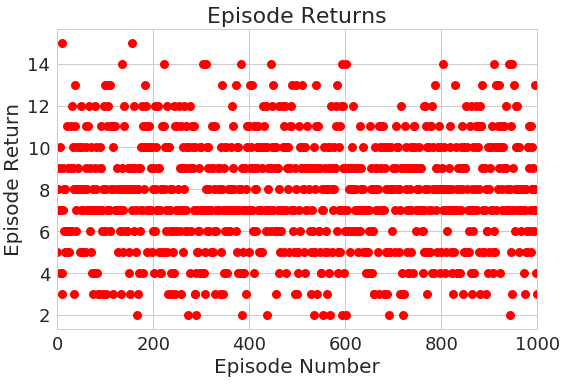

In [20]:
# Running the q-learning algorithm.
model_free_rl.sarsa(env)

# Plotting the returns at each episode.
model_free_rl.plot_epsiode_returns()

# Plotting the epsilon parameters at each episode.
model_free_rl.plot_epsilon_parameters()

# Plotting the step size parameter for a state.
model_free_rl.plot_alpha_parameters(s=2)

# Simulating using policy that was learned and the last epsiode is displayed.
model_free_rl.simulate_policy(env)

# Plotting the returns at each episode.
model_free_rl.scatter_epsiode_returns()

# OpenAI Gym Frozen Lake Example. This environment has holes to fall into that end an episode and give 0 reward like all other steps. Ending up in the goal state gives reward 1 and ends the episode. Moves are also uncertain with actions possibly resulting in a different action than intended.

In [24]:
env = gym.make('FrozenLake-v0')
# Creating parameters needed for ModelFreeRL class.
n = env.observation_space.n
states = range(n)
m = env.action_space.n
actions = range(m)

# Creating instance of the class, using epsilon greedy decay and step size decay.
model_free_rl = ModelFreeRL(n=n, m=m, states=states, actions=actions, epsilon=.3, 
                            alpha=.3, epsilon_decay_param=.0001, num_episodes=5000)

[2017-08-01 09:19:42,389] Making new env: FrozenLake-v0


# OpenAI Gym Frozen Lake Example with Q-Learning

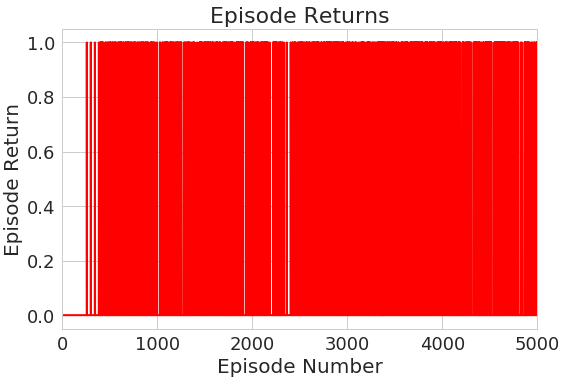

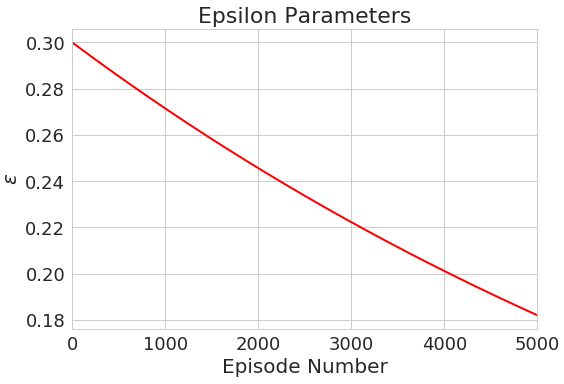

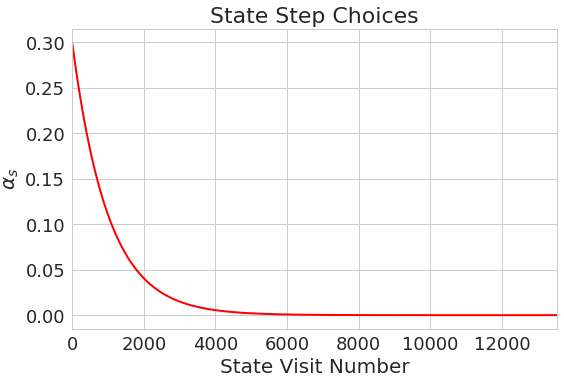


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


Average reward over 1000 episodes is 0.522000




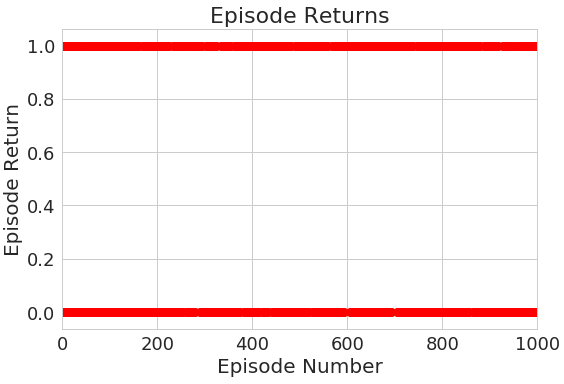

In [25]:
# Running the q-learning algorithm.
model_free_rl.q_learning(env)

# Plotting the returns at each episode.
model_free_rl.plot_epsiode_returns()

# Plotting the epsilon parameters at each episode.
model_free_rl.plot_epsilon_parameters()

# Plotting the step size parameter for a state.
model_free_rl.plot_alpha_parameters(s=2)

# Simulating using policy that was learned and the last epsiode is displayed.
model_free_rl.simulate_policy(env)

# Plotting the returns at each episode.
model_free_rl.scatter_epsiode_returns()

#  OpenAI Gym Frozen Lake Example with SARSA

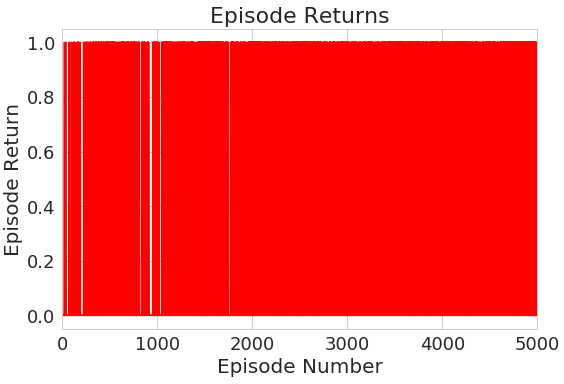

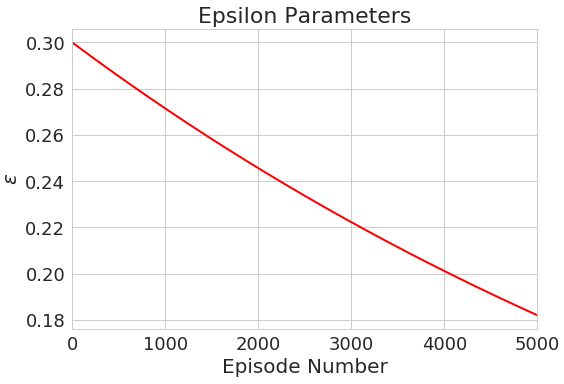

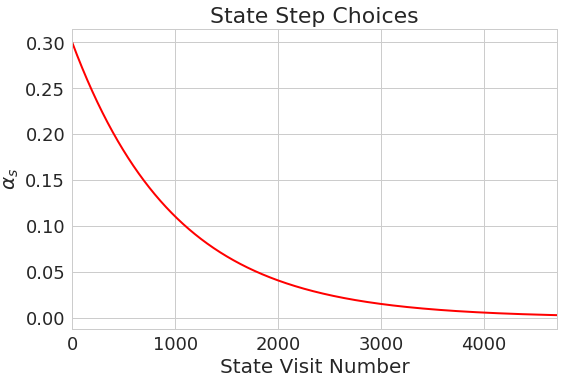


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG


Average reward over 1000 episodes is 0.740000




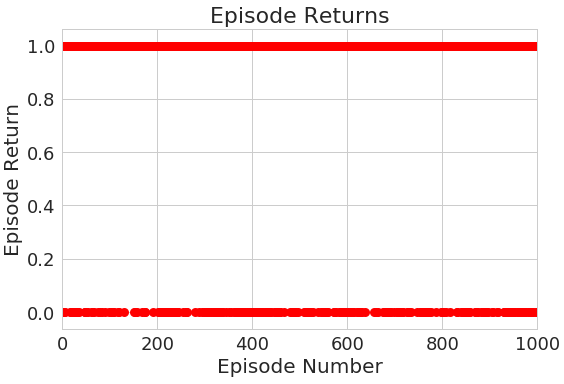

In [26]:
# Running the q-learning algorithm.
model_free_rl.q_learning(env)

# Plotting the returns at each episode.
model_free_rl.plot_epsiode_returns()

# Plotting the epsilon parameters at each episode.
model_free_rl.plot_epsilon_parameters()

# Plotting the step size parameter for a state.
model_free_rl.plot_alpha_parameters(s=2)

# Simulating using policy that was learned and the last epsiode is displayed.
model_free_rl.simulate_policy(env)

# Plotting the returns at each episode.
model_free_rl.scatter_epsiode_returns()